In [2]:
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль

import numpy as np # уже знакомые нам библиотеки
import pandas as pd

#from pandas.plotting import register_matplotlib_converters # для корректной конвертации времени
#register_matplotlib_converters() 

import seaborn as sns # наводим красоту
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

#### Упражнение 1
* Реализуйте функцию plot_horizontal_bar, рисующую горизонтальные bar'ы

In [3]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)
print(bars_length)




[-9 -8 -8 -2 -2 -1  6  8  8  9]


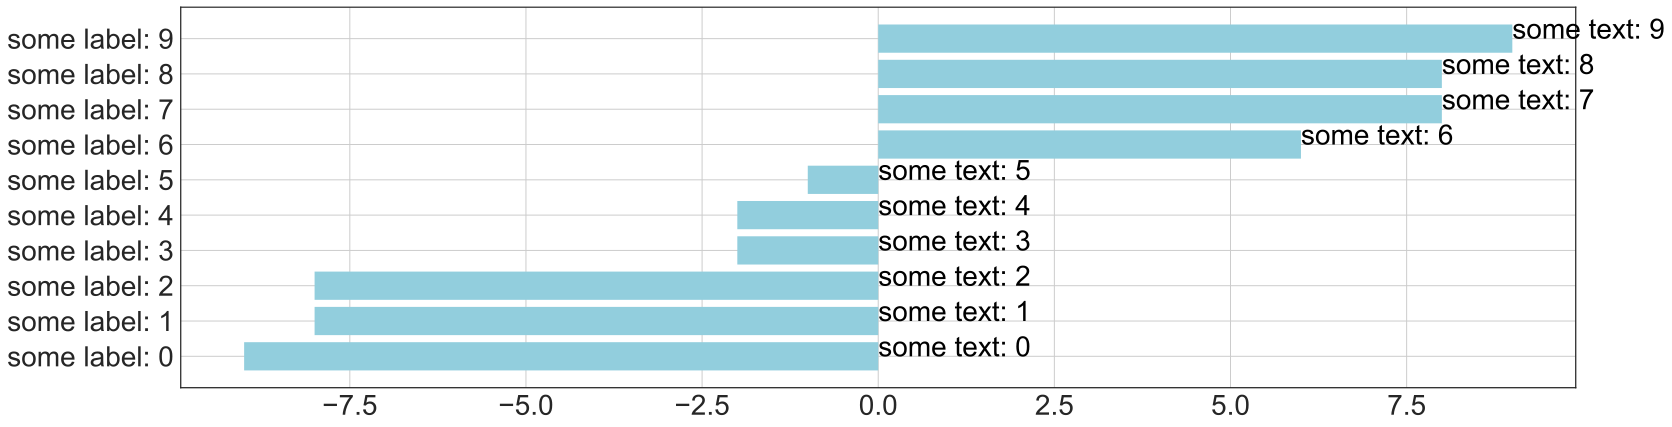

In [11]:
def plot_horizontal_bar (bars_length, labels, yticks_labels, figsize):
    
    plt.figure(figsize = figsize)
    plt.barh(np.arange(len(bars_length)),bars_length,label = labels, color = '#92cedd')
    plt.yticks(np.arange(len(bars_length)), yticks_labels,size = 28)
    plt.xticks(size = 28)

    weight_f = lambda i: bars_length[i]  if bars_length[i] > 0 else 0

    for i, label in enumerate(labels):    
        w = weight_f(i)
        plt.text(w, i ,str(label), color='black', size = 28)
    plt.grid(True)
    plt.show()
    
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)    

#### Упражнение 2
* Реализуйте функцию plot_time_probabilities, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [5]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)



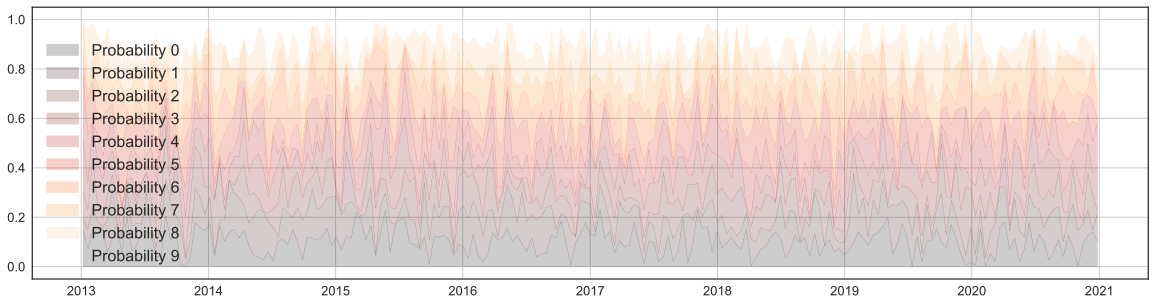

In [6]:
def plot_time_probabilities(probabilities_in_time, figsize):
    cmap = plt.cm.gist_heat(np.linspace(0,1,10))
    #color_list = ['white','red','green','blue','orange','yellow','grey','black','brown','green']
    plt.figure(figsize=figsize)
    lower_topic = 0
    for i in range(len(probabilities_in_time.columns)):
        upper_topic = lower_topic + probabilities_in_time[i]
        plt.fill_between(probabilities_in_time.index, lower_topic ,upper_topic ,color=cmap[i], alpha=0.2, label = 'Probability {}'.format(i))
        lower_topic = upper_topic
    plt.xticks(size = 13)
    plt.yticks(size = 13)
    plt.grid(True)   
    plt.legend(prop={'size': 16},loc = 'lower left')
    plt.show()
    
plot_time_probabilities(probabilities_in_time, figsize)   